In [2]:
import numpy as np

import seaborn as sns  # Import seaborn for heatmap visualization

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, roc_auc_score, confusion_matrix

In [3]:
# loading dataset
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

digits = load_digits()

# Selecting features and target
X = digits.data
Y = digits.target

# Splitting training and testing data (80% train and 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=72)

# train the model
model_rf = RandomForestClassifier(random_state=72) # (Metric Coders 2024)
model_rf.fit(X_train, Y_train)


RandomForestClassifier(random_state=72)

In [4]:
# Predictions
pred_rf = model_rf.predict(X_test)
y_prob = model_rf.predict_proba(X_test)

# Evaluations
bal_acc_rf =balanced_accuracy_score(Y_test, pred_rf)
roc_rf = roc_auc_score(Y_test, y_prob, multi_class="ovr", average="macro")

print("Balanced Accuracy:", bal_acc_rf)
print("\nROC AUC Score:", roc_rf)

Balanced Accuracy: 0.9800913742690058

ROC AUC Score: 0.9999025726447266


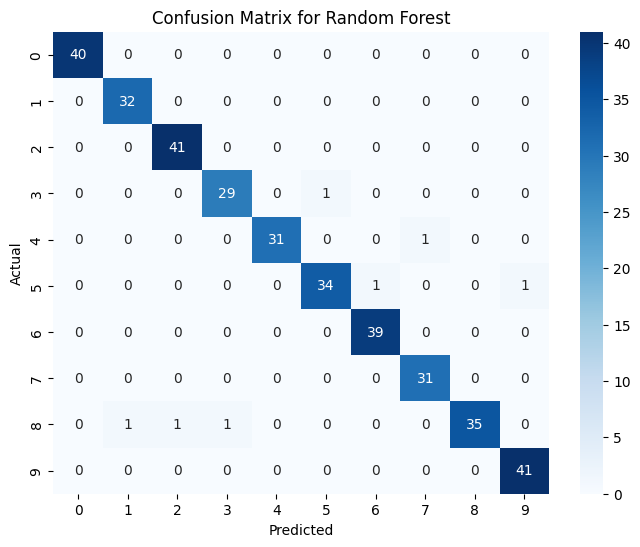

In [4]:
#confusion matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100],                 
    'max_depth': [None, 10],              
    'min_samples_split': [2],              
    'min_samples_leaf': [1],               
    'criterion': ['gini'],                
    'max_features': [None],    
    'bootstrap': [True]                        
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=72), param_grid_rf, cv=5, scoring="balanced_accuracy", verbose=1)
grid_search_rf.fit(X_train, Y_train)

# Best Parameters
best_rf = grid_search_rf.best_estimator_
print(f"\nBest Random Forest Parameters: {grid_search_rf.best_params_}")


Fitting 5 folds for each of 2 candidates, totalling 10 fits

Best Random Forest Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [16]:
# Extract best parameters from GridSearch
best_params_rf = grid_search_rf.best_params_

# Train optimized Random Forest model
optimal_model_rf = RandomForestClassifier(**best_params_rf, random_state=72)

# Fit the optimized model
optimal_model_rf.fit(X_train, Y_train)

# Predictions & evaluation
optimal_pred_rf = optimal_model_rf.predict(X_test)
accuracy_optimized_rf = accuracy_score(Y_test, optimal_pred_rf)
bal_acc_rf = balanced_accuracy_score(Y_test, optimal_pred_rf)

# Print results
print(f"Optimized Random Forest Accuracy: {accuracy_optimized_rf:.4f}")
print(f"Balanced Accuracy: {bal_acc_rf:.4f}")
 

Optimized Random Forest Accuracy: 0.9861
Balanced Accuracy: 0.9857


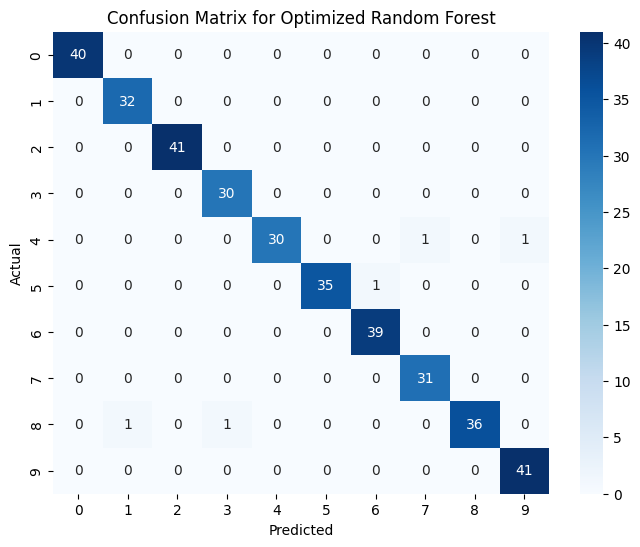

In [ ]:
# Confusion Matrix for the optimized Random Forest model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(Y_test, optimal_pred_rf), annot=True, fmt="d", cmap="Blues", xticklabels=digits.target_names, yticklabels=digits.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Optimized Random Forest")
plt.show()